In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time

In [2]:
df1 = pd.read_excel("ttc-subway-delay-data-2020.xlsx")

In [3]:
df2 = pd.read_excel("ttc-subway-delay-data-2021.xlsx")

In [4]:
df3 = pd.read_excel("ttc-subway-delay-data-2022.xlsx")

In [5]:
df1.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,SRDP,8,13,N,SRT,3025
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,MUI,7,12,S,YU,5591
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,EUNT,3,7,W,BD,5371
3,2020-01-01,03:54,Wednesday,KIPLING STATION,MUIS,0,0,E,BD,5243
4,2020-01-01,08:07,Wednesday,KEELE STATION,MUNOA,4,9,W,BD,5011


In [6]:
df2.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2021-01-01,00:33,Friday,BLOOR STATION,MUPAA,0,0,N,YU,6046
1,2021-01-01,00:39,Friday,SHERBOURNE STATION,EUCO,5,9,E,BD,5250
2,2021-01-01,01:07,Friday,KENNEDY BD STATION,EUCD,5,9,E,BD,5249
3,2021-01-01,01:41,Friday,ST CLAIR STATION,MUIS,0,0,NaN,YU,0
4,2021-01-01,02:04,Friday,SHEPPARD WEST STATION,MUIS,0,0,NaN,YU,0


In [7]:
df3.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [8]:
df1.shape

(1339, 10)

In [9]:
df2.shape

(1216, 10)

In [10]:
df3.shape

(8414, 10)

# Joining the dataframes

In [11]:
# we can use merge or >join to join df vertically (axis = 1)
# we can use concat or >append to join df horizontally (axis = 0)

In [12]:
df = pd.concat([df1,df2,df3],ignore_index=True)

In [13]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,SRDP,8,13,N,SRT,3025
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,MUI,7,12,S,YU,5591
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,EUNT,3,7,W,BD,5371
3,2020-01-01,03:54,Wednesday,KIPLING STATION,MUIS,0,0,E,BD,5243
4,2020-01-01,08:07,Wednesday,KEELE STATION,MUNOA,4,9,W,BD,5011


In [14]:
df.tail()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
10964,2022-05-31,15:28,Tuesday,BAYVIEW STATION,SUDP,3,6,E,SHP,6171
10965,2022-05-31,18:20,Tuesday,DON MILLS STATION,MUPAA,0,0,W,SHP,6191
10966,2022-05-31,19:02,Tuesday,LESLIE STATION,MUSC,0,0,W,SHP,6146
10967,2022-05-31,20:05,Tuesday,BESSARION STATION,MUSC,0,0,W,SHP,6176
10968,2022-05-31,22:51,Tuesday,LESLIE STATION,MUIS,0,0,NaN,SHP,0


In [15]:
df.columns

Index(['Date', 'Time', 'Day', 'Station', 'Code', 'Min Delay', 'Min Gap',
       'Bound', 'Line', 'Vehicle'],
      dtype='object')

In [16]:
df.dtypes

Date         datetime64[ns]
Time                 object
Day                  object
Station              object
Code                 object
Min Delay             int64
Min Gap               int64
Bound                object
Line                 object
Vehicle               int64
dtype: object

In [17]:
df = df.loc[:,['Date', 'Time', 'Day', 'Station',
       'Bound', 'Line', 'Vehicle', 'Code', 'Min Gap', 'Min Delay']]

In [18]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [19]:
df.shape

(10969, 10)

In [20]:
df.nunique().sort_values(ascending = False)

Time         1364
Vehicle       630
Date          213
Station       210
Code          173
Min Gap       107
Min Delay     100
Line           12
Day             7
Bound           5
dtype: int64

In [21]:
df.isnull().sum().sort_values(ascending = False)

Bound        2826
Line           23
Min Delay       0
Min Gap         0
Code            0
Vehicle         0
Station         0
Day             0
Time            0
Date            0
dtype: int64

In [22]:
df = df.dropna(axis = 0,subset = ['Line']).reset_index(drop=True)
#axis = 0 - row vise dropping, drop the rows in Line column which are null

In [23]:
df.shape

(10946, 10)

In [24]:
df.isnull().sum().sort_values(ascending = False)

Bound        2808
Min Delay       0
Min Gap         0
Code            0
Vehicle         0
Line            0
Station         0
Day             0
Time            0
Date            0
dtype: int64

In [25]:
df['Bound'].unique()

array(['N', 'S', 'W', 'E', nan, 'B'], dtype=object)

In [26]:
df['Bound'].value_counts()

S    2986
N    2190
E    1479
W    1460
B      23
Name: Bound, dtype: int64

In [27]:
B_mode = df['Bound'].mode()[0]

In [28]:
B_mode

'S'

In [29]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [30]:
#df['Bound'].fillna(B_mode,inplace = True)

In [31]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [32]:
df['Bound'].value_counts()

S    2986
N    2190
E    1479
W    1460
B      23
Name: Bound, dtype: int64

In [33]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [34]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [35]:
#df.replace('S','O')

In [36]:
df['Bound'][0]

'N'

In [37]:
df.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [38]:
df_NaN = df[df['Bound'].isna()]

In [39]:
df_NaN.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
13,2020-01-01,14:25,Wednesday,DUNDAS WEST STATION,NaN,BD,0,MUIS,0,0
19,2020-01-01,19:46,Wednesday,DUNDAS STATION,NaN,YU,0,MUIRS,0,0
20,2020-01-01,20:12,Wednesday,VICTORIA PARK STATION,NaN,BD,0,PUMEL,0,0
21,2020-01-01,22:00,Wednesday,YONGE-UNIVERSITY & BLO,NaN,YU/BD,0,MUO,0,0
26,2020-01-02,00:37,Thursday,WARDEN STATION,NaN,BD,0,MUIS,0,0


In [40]:
df_no_NaN = pd.concat([df, df_NaN]).drop_duplicates(keep=False)

In [41]:
df_no_NaN.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4


In [42]:
df_NaN['Bound_imputed'] = 1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_no_NaN['Bound_imputed'] = 0

In [44]:
df_NaN.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay,Bound_imputed
13,2020-01-01,14:25,Wednesday,DUNDAS WEST STATION,NaN,BD,0,MUIS,0,0,1
19,2020-01-01,19:46,Wednesday,DUNDAS STATION,NaN,YU,0,MUIRS,0,0,1
20,2020-01-01,20:12,Wednesday,VICTORIA PARK STATION,NaN,BD,0,PUMEL,0,0,1
21,2020-01-01,22:00,Wednesday,YONGE-UNIVERSITY & BLO,NaN,YU/BD,0,MUO,0,0,1
26,2020-01-02,00:37,Thursday,WARDEN STATION,NaN,BD,0,MUIS,0,0,1


In [45]:
df_no_NaN.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay,Bound_imputed
0,2020-01-01,01:18,Wednesday,KENNEDY SRT STATION,N,SRT,3025,SRDP,13,8,0
1,2020-01-01,01:27,Wednesday,SHEPPARD WEST STATION,S,YU,5591,MUI,12,7,0
2,2020-01-01,02:22,Wednesday,MAIN STREET STATION,W,BD,5371,EUNT,7,3,0
3,2020-01-01,03:54,Wednesday,KIPLING STATION,E,BD,5243,MUIS,0,0,0
4,2020-01-01,08:07,Wednesday,KEELE STATION,W,BD,5011,MUNOA,9,4,0


In [46]:
df_final = pd.concat([df_NaN,df_no_NaN],ignore_index=True)

In [47]:
df_final.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay,Bound_imputed
0,2020-01-01,14:25,Wednesday,DUNDAS WEST STATION,NaN,BD,0,MUIS,0,0,1
1,2020-01-01,19:46,Wednesday,DUNDAS STATION,NaN,YU,0,MUIRS,0,0,1
2,2020-01-01,20:12,Wednesday,VICTORIA PARK STATION,NaN,BD,0,PUMEL,0,0,1
3,2020-01-01,22:00,Wednesday,YONGE-UNIVERSITY & BLO,NaN,YU/BD,0,MUO,0,0,1
4,2020-01-02,00:37,Thursday,WARDEN STATION,NaN,BD,0,MUIS,0,0,1


In [48]:
df_final.shape

(10936, 11)

In [49]:
df_final.isnull().sum().sort_values(ascending = False)

Bound            2808
Bound_imputed       0
Min Delay           0
Min Gap             0
Code                0
Vehicle             0
Line                0
Station             0
Day                 0
Time                0
Date                0
dtype: int64

In [50]:
df_final['Bound'].value_counts()

S    2980
N    2188
E    1479
W    1458
B      23
Name: Bound, dtype: int64

In [51]:
B2_mode = df_final['Bound'].mode()[0]

In [52]:
df_final['Bound'].fillna(B2_mode,inplace = True)

In [53]:
df_final['Bound'].value_counts()

S    5788
N    2188
E    1479
W    1458
B      23
Name: Bound, dtype: int64

In [54]:
df_final['Bound'].unique()

array(['S', 'N', 'W', 'E', 'B'], dtype=object)

In [55]:
df_final.head()

,Date,Time,Day,Station,Bound,Line,Vehicle,Code,Min Gap,Min Delay,Bound_imputed
0,2020-01-01,14:25,Wednesday,DUNDAS WEST STATION,S,BD,0,MUIS,0,0,1
1,2020-01-01,19:46,Wednesday,DUNDAS STATION,S,YU,0,MUIRS,0,0,1
2,2020-01-01,20:12,Wednesday,VICTORIA PARK STATION,S,BD,0,PUMEL,0,0,1
3,2020-01-01,22:00,Wednesday,YONGE-UNIVERSITY & BLO,S,YU/BD,0,MUO,0,0,1
4,2020-01-02,00:37,Thursday,WARDEN STATION,S,BD,0,MUIS,0,0,1


In [56]:
df_final['Bound_imputed'].unique()

array([1, 0])

In [57]:
df_final['Bound_imputed'].value_counts()

0    8128
1    2808
Name: Bound_imputed, dtype: int64

In [58]:
df_final = df_final.loc[:,['Date','Time','Day','Station','Bound','Bound_imputed','Line','Vehicle','Code','Min Gap','Min Delay']]

In [77]:
df_final.head()

,Date,Time,Day,Station,Bound,Bound_imputed,Line,Vehicle,Code,Min Gap,Min Delay
0,2020-01-01,14:25,Wednesday,DUNDAS WEST STATION,S,1,BD,0,MUIS,0,0
1,2020-01-01,19:46,Wednesday,DUNDAS STATION,S,1,YU,0,MUIRS,0,0
2,2020-01-01,20:12,Wednesday,VICTORIA PARK STATION,S,1,BD,0,PUMEL,0,0
3,2020-01-01,22:00,Wednesday,YONGE-UNIVERSITY & BLO,S,1,YU/BD,0,MUO,0,0
4,2020-01-02,00:37,Thursday,WARDEN STATION,S,1,BD,0,MUIS,0,0


In [60]:
df_final.dtypes

Date             datetime64[ns]
Time                     object
Day                      object
Station                  object
Bound                    object
Bound_imputed             int64
Line                     object
Vehicle                   int64
Code                     object
Min Gap                   int64
Min Delay                 int64
dtype: object

In [61]:
df_final['Min Delay'].value_counts().sum()

10936

In [62]:
df_final['Bound'].value_counts().sum()

10936

In [98]:
df_final.nunique().sort_values(ascending = False)

Time             1363
Vehicle           629
Date              213
Station           209
Code              173
Min Gap           107
Min Delay         100
Line               12
Day                 7
Bound               5
Bound_imputed       2
dtype: int64

In [99]:
df1.nunique().sort_values(ascending = False)

Time         793
Vehicle      380
Station      114
Code         101
Min Gap       36
Min Delay     34
Date          31
Line           7
Day            7
Bound          4
dtype: int64

In [100]:
df2.nunique().sort_values(ascending = False)

Time         765
Vehicle      298
Station      104
Code         101
Min Gap       43
Min Delay     41
Date          31
Line           7
Day            7
Bound          4
dtype: int64

In [101]:
df3.nunique().sort_values(ascending = False)

Time         1352
Vehicle       589
Station       176
Code          163
Date          151
Min Gap        95
Min Delay      89
Line           10
Day             7
Bound           5
dtype: int64

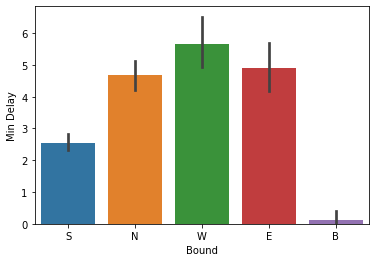

In [63]:
sns.barplot(x = 'Bound',y = 'Min Delay',data = df_final)
plt.show()

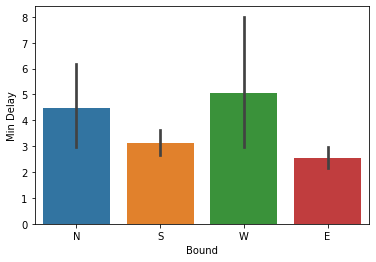

In [86]:
sns.barplot(x = 'Bound',y = 'Min Delay',data = df1)
plt.show()

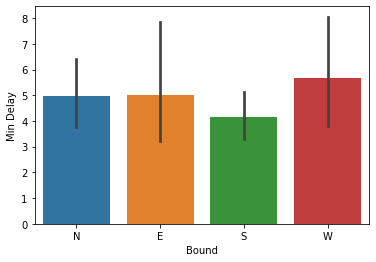

In [87]:
sns.barplot(x = 'Bound',y = 'Min Delay',data = df2)
plt.show()

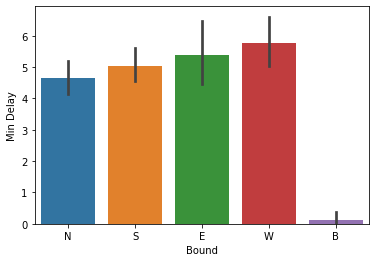

In [88]:
sns.barplot(x = 'Bound',y = 'Min Delay',data = df3)
plt.show()

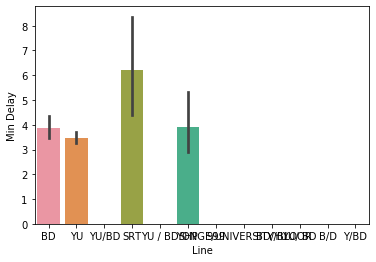

In [64]:
sns.barplot(x = 'Line',y = 'Min Delay',data = df_final)
plt.show()

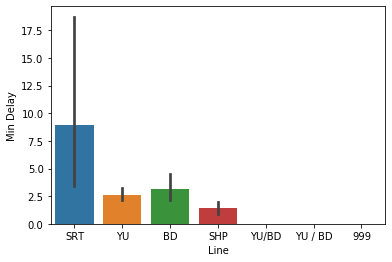

In [89]:
sns.barplot(x = 'Line',y = 'Min Delay',data = df1)
plt.show()

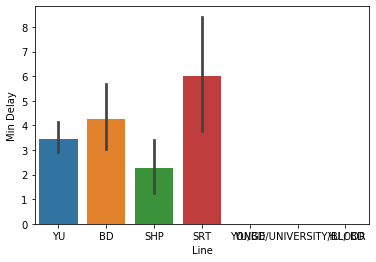

In [90]:
sns.barplot(x = 'Line',y = 'Min Delay',data = df2)
plt.show()

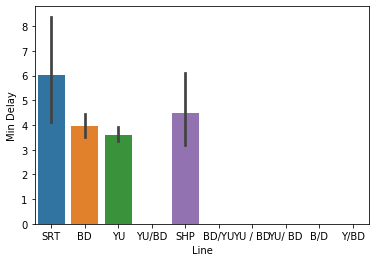

In [91]:
sns.barplot(x = 'Line',y = 'Min Delay',data = df3)
plt.show()

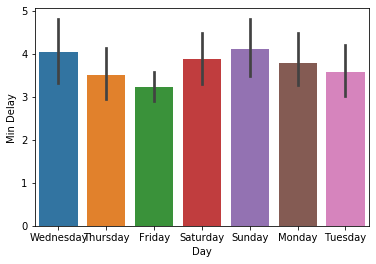

In [65]:
sns.barplot(x = 'Day',y = 'Min Delay',data = df_final)
plt.show()

In [116]:
df1['Date'].unique()

array(['2020-01-01T00:00:00.000000000', '2020-01-02T00:00:00.000000000',
       '2020-01-03T00:00:00.000000000', '2020-01-04T00:00:00.000000000',
       '2020-01-05T00:00:00.000000000', '2020-01-06T00:00:00.000000000',
       '2020-01-07T00:00:00.000000000', '2020-01-08T00:00:00.000000000',
       '2020-01-09T00:00:00.000000000', '2020-01-10T00:00:00.000000000',
       '2020-01-11T00:00:00.000000000', '2020-01-12T00:00:00.000000000',
       '2020-01-13T00:00:00.000000000', '2020-01-14T00:00:00.000000000',
       '2020-01-15T00:00:00.000000000', '2020-01-16T00:00:00.000000000',
       '2020-01-17T00:00:00.000000000', '2020-01-18T00:00:00.000000000',
       '2020-01-19T00:00:00.000000000', '2020-01-20T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-01-22T00:00:00.000000000',
       '2020-01-23T00:00:00.000000000', '2020-01-24T00:00:00.000000000',
       '2020-01-25T00:00:00.000000000', '2020-01-26T00:00:00.000000000',
       '2020-01-27T00:00:00.000000000', '2020-01-28

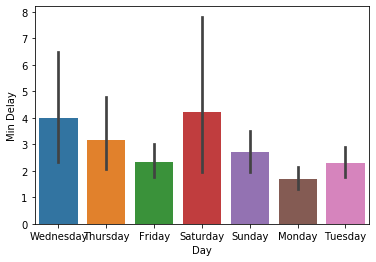

In [92]:
sns.barplot(x = 'Day',y = 'Min Delay',data = df1)
plt.show()

In [115]:
df2['Date'].unique()

array(['2021-01-01T00:00:00.000000000', '2021-01-02T00:00:00.000000000',
       '2021-01-03T00:00:00.000000000', '2021-01-04T00:00:00.000000000',
       '2021-01-05T00:00:00.000000000', '2021-01-06T00:00:00.000000000',
       '2021-01-07T00:00:00.000000000', '2021-01-08T00:00:00.000000000',
       '2021-01-09T00:00:00.000000000', '2021-01-10T00:00:00.000000000',
       '2021-01-11T00:00:00.000000000', '2021-01-12T00:00:00.000000000',
       '2021-01-13T00:00:00.000000000', '2021-01-14T00:00:00.000000000',
       '2021-01-15T00:00:00.000000000', '2021-01-16T00:00:00.000000000',
       '2021-01-17T00:00:00.000000000', '2021-01-18T00:00:00.000000000',
       '2021-01-19T00:00:00.000000000', '2021-01-20T00:00:00.000000000',
       '2021-01-21T00:00:00.000000000', '2021-01-22T00:00:00.000000000',
       '2021-01-23T00:00:00.000000000', '2021-01-24T00:00:00.000000000',
       '2021-01-25T00:00:00.000000000', '2021-01-26T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-01-28

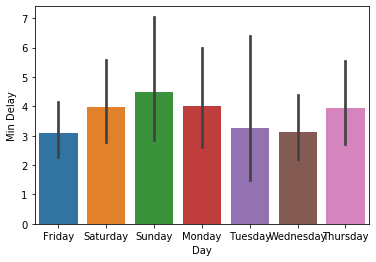

In [93]:
sns.barplot(x = 'Day',y = 'Min Delay',data = df2)
plt.show()

In [117]:
df3['Date'].unique()

array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-06T00:00:00.000000000',
       '2022-01-07T00:00:00.000000000', '2022-01-08T00:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-10T00:00:00.000000000',
       '2022-01-11T00:00:00.000000000', '2022-01-12T00:00:00.000000000',
       '2022-01-13T00:00:00.000000000', '2022-01-14T00:00:00.000000000',
       '2022-01-15T00:00:00.000000000', '2022-01-16T00:00:00.000000000',
       '2022-01-17T00:00:00.000000000', '2022-01-18T00:00:00.000000000',
       '2022-01-19T00:00:00.000000000', '2022-01-20T00:00:00.000000000',
       '2022-01-21T00:00:00.000000000', '2022-01-22T00:00:00.000000000',
       '2022-01-23T00:00:00.000000000', '2022-01-24T00:00:00.000000000',
       '2022-01-25T00:00:00.000000000', '2022-01-26T00:00:00.000000000',
       '2022-01-27T00:00:00.000000000', '2022-01-28

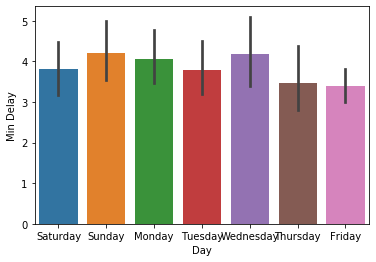

In [94]:
sns.barplot(x = 'Day',y = 'Min Delay',data = df3)
plt.show()

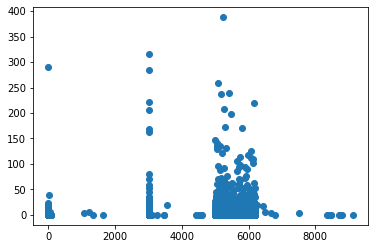

In [66]:
vehicle = df_final['Vehicle']
delay = df_final['Min Delay']
plt.scatter(vehicle,delay)
plt.show()

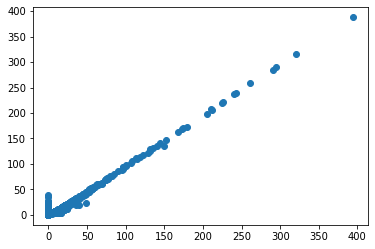

In [67]:
gap = df_final['Min Gap']
delay = df_final['Min Delay']
plt.scatter(gap,delay)
plt.show()

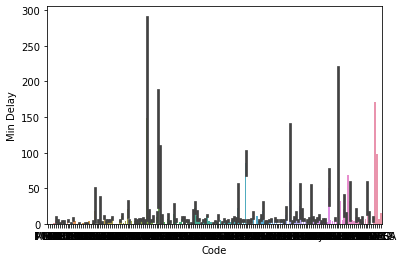

In [108]:
sns.barplot(x = 'Code',y = 'Min Delay',data = df_final)
plt.show()

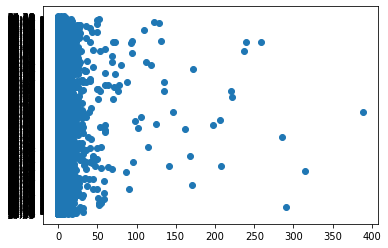

In [119]:
Time = df_final['Time']
delay = df_final['Min Delay']
plt.scatter(delay,Time)
plt.show()

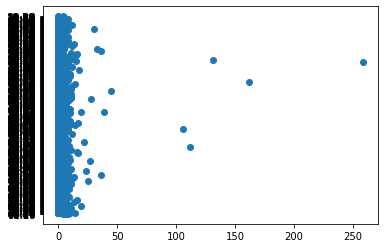

In [129]:
Time = df1['Time']
delay = df1['Min Delay']
plt.scatter(delay,Time)
plt.show()

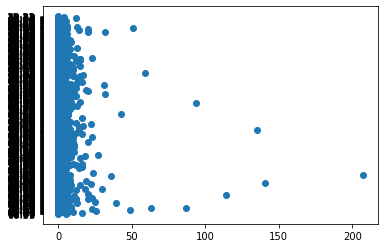

In [130]:
Time = df2['Time']
delay = df2['Min Delay']
plt.scatter(delay,Time)
plt.show()

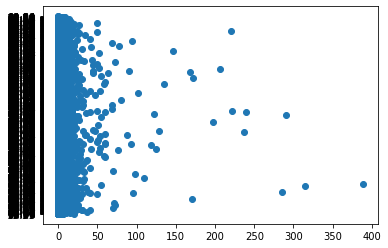

In [131]:
Time = df3['Time']
delay = df3['Min Delay']
plt.scatter(delay,Time)
plt.show()